<a href="https://colab.research.google.com/github/MohdSharik99/Capstone-Project-HEALTH-INSURANCE-CROSS-SELL-PREDICTION---Classification/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

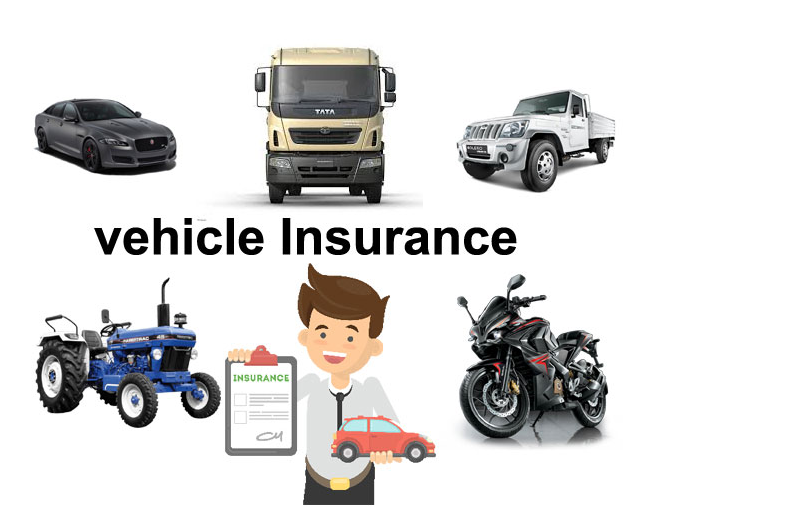

---



---



# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

## Approach taken:
This project is divided into multiple section where each section will have it's own importance towards our problem statement. the approach that we will be following in this project is given as-

Section 1: Data overview : In this section we will be importing important libraries and simply load our dataset into google colab and will explore the basic information about data.

Section 2: Exploratory Data Analysis : In this section We fill focus on Exploratory data analysis of the dataset using various methods and visualization plot and will be extracting the information from this dataset as much as we can.

Section 3: Outliers handling : In this section we will be dealing with outliers in out dataset and will see how to define our outlier criteria and deal with outliers.

Section 4: Data preprocessing : In this Section we will be splitting the data into training and testing dataset then we will be scaling the data.

Section 6: Model implimentation : In this section we will be applying and evaluting the ML models to predict the results and .

Section 7: Model Explainability : In this section we will use model explainability to explain the results.

Section 8: In this section we will be giving a quick summary of entire notebook.



# Section 1 :  Data overview


In [1]:
# installing the important libraries
! pip install shap
!pip install lime
! pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
 
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [3]:
# mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing the original dataset and saving it as initial_df
initial_df  =  pd.read_csv('/content/drive/MyDrive/Capstone Projects/Capstone Project - Health Insurance Cross sell prediction(Classification): : Mohd Sharik /TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [5]:
# creating a copy of the given data and naming it as df
df = initial_df.copy()

In [6]:
# exploring first 5 rows
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [7]:
# getting basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
# checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
# checking for unique value in each column
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [10]:
# Dropping id column
df = df.drop('id', axis =1)

In [11]:
# describing the dataset for numerical features
df.describe()

Age  Driving_License    Region_Code  Previously_Insured  \
count  381109.000000    381109.000000  381109.000000       381109.000000   
mean       38.822584         0.997869      26.388807            0.458210   
std        15.511611         0.046110      13.229888            0.498251   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   381109.000000         381109.000000  381109.000000  381109.000000  
mean     30564.389581            112.034295     154.347397       0.122563  
std      17213.155057             54.203995      83.671304       0.327936  
min       2630.000000              1.000000      10.000000       0.000000  
25%      24405.000000             29.000000      82.000000       0.000000  
50%      31669.000000            133.000000     154.000000       0.000000  
75%      39400.000000            152.000000     227.000000       0.000000  
max     540165.000000            163.000000     299.000000       1.000000

In [12]:
# describing the data for categoical features
df.describe(include = 'object')

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

# Summary: Section 1 :- 

In this section we have performed many minor task we started with installing some important libraries and then we moved to importing some important modules that we will require through out this project. Most importantly we have explored our dataset and found use informations as given below.

*   We are given 381109 records distributed across 12 features. these features are both numerical and categorical.
*   Target column named as Response has two categories 0 (Faliure) and 1 (Success)
*    No value is missing in the dataset hence we won't missing value treatment section in this project.
*   We also have got unique values that we owened list contained by each column.
*   Finally we have statistically described our dataset. Where we have seen min, max, median etc of each numarical and categorical feature



# Exploratory Data Analysis

In this section we will explore each feature in depth and hence this section is named as EDA (Exploratory Data Analysis). This section will be helpful to understand the trend in features also we will be dealing with bi-variate analysis to understand that what values are leading to success and failure. In order to visualize the data trends and distributions we will be using matplotlib and seaborn libraries which will allow us to plot various plots for our data visualization.

In [13]:
# Let's start with the taget feature i.e response column
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Analysis on Gender

Male      206089
Female    175020
Name: Gender, dtype: int64

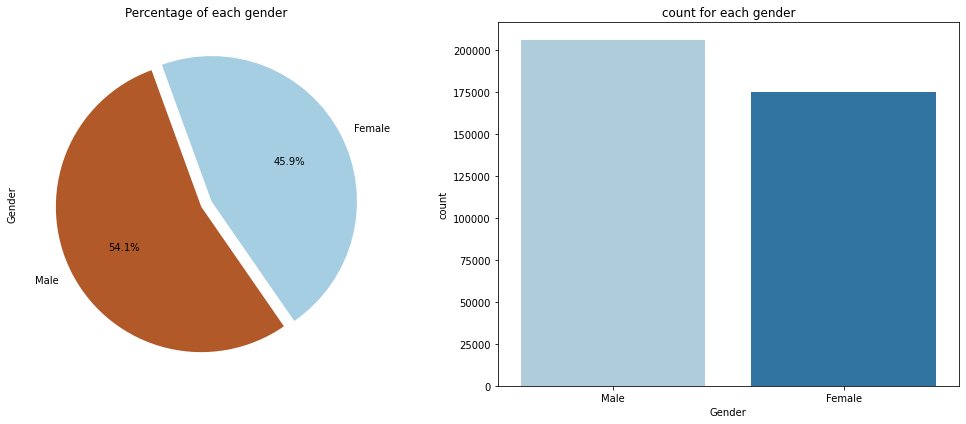

In [14]:
# Exploring Gender using pie plot and barplot

# creating two figures in a row for the visualization
fig , axes  = plt.subplots(1,2,figsize = (14,6 ))

# Plotting Pie plot to check the gender distribution percent wise
df['Gender'].value_counts().plot.pie( autopct = '%.1f%%', explode = [0.04,0.04], startangle = 110, cmap = 'Paired_r', ax = axes[0])
axes[0].set_title('Percentage of each gender')

# plotting count plot for gender
sns.countplot(data = df , x = 'Gender', palette = 'Paired', ax =  axes[1])
axes[1].set_title('count for each gender')


plt.tight_layout()

df['Gender'].value_counts()

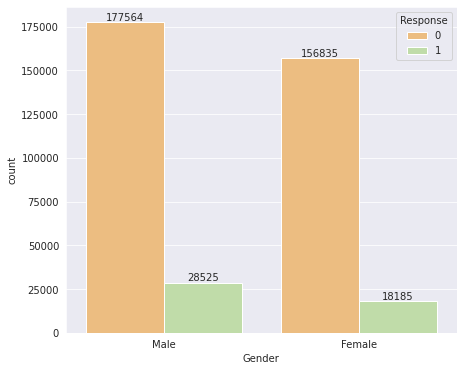

In [15]:
# Analyzing gender for response to see if we have any trend in responses

sns.set_style('darkgrid')

# defining the figure size
plt.figure(figsize = (7,6))

# plotting the countplot for responses for each gender
ax = sns.countplot(data = df , x = 'Gender', palette = 'Spectral', hue = 'Response')


# labeling each bar of the plot
for p in ax.containers:
    ax.bar_label(p, label_type='edge')
plt.show()




### Age

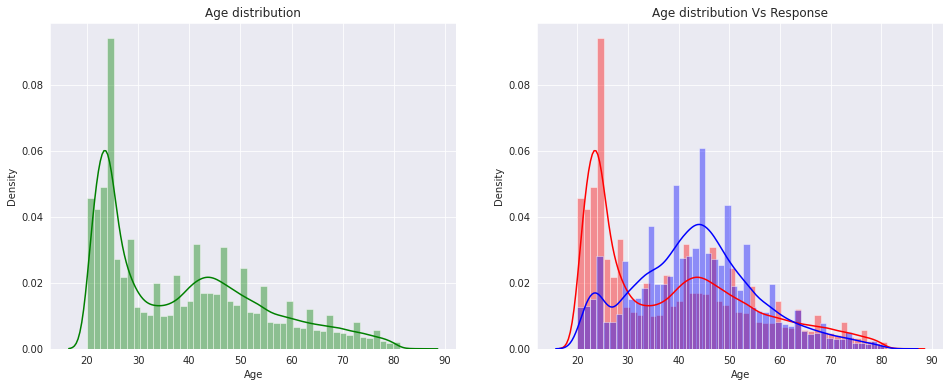

<Figure size 432x288 with 0 Axes>

In [16]:
# understanding the Age feature distribution and it's effect on success/failure of insurance conversion 

# Defining the figure using subplots for two plots in one row
fig, axes = plt.subplots( 1,2 , figsize = (16,6))

# plotting distplot for Age column
sns.distplot( x= df['Age'], color= 'g', ax =axes[0])
axes[0].set_title('Age distribution')
axes[0].set_xlabel('Age')

# plotting distplot for Age and analyzing the effect on success/failure of insurance conversion
sns.distplot( x= df['Age'], color= 'r', ax =axes[1])
sns.distplot( x= df.Age[df['Response'] == 1], color= 'b', ax =axes[1])
axes[1].set_title('Age distribution Vs Response')
axes[1].set_xlabel('Age')

plt.show()
plt.tight_layout()

### Region code

In [17]:
# checking for numerically max value for region code
df['Region_Code'].max()

52.0

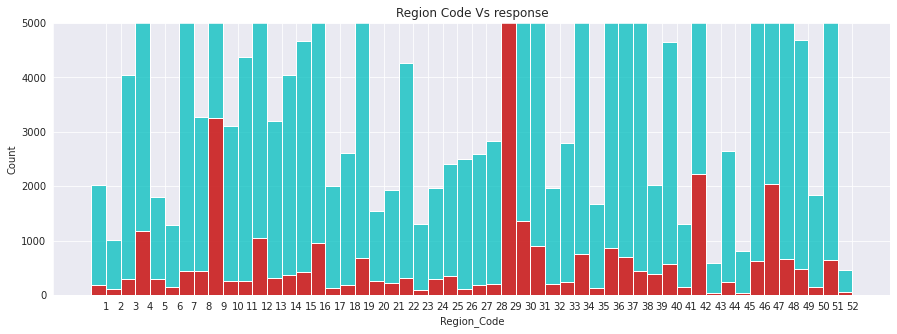

In [18]:
# Analyzing region code feature and it's effect on response feature

# defining the figure for visualization
plt.figure(figsize = (15,5))

# no. of ticks on plot along x Axis
ticks = list(range(1,53))

# converting the datatype from flaot to int
df['Region_Code'] = df['Region_Code'].astype(int) 

# Plotting the reason code and it's effect on response in same plot
sns.histplot( x= df['Region_Code'], color = 'c', bins =52)
sns.histplot( x= df['Region_Code'][df['Response'] ==1 ],  color = 'r', bins =52)

plt.ylim(0,5000)
plt.xticks(ticks)
plt.title('Region Code Vs response')
plt.show()



In [19]:
# checking counts for DL
df['Driving_License'].value_counts()



1    380297
0       812
Name: Driving_License, dtype: int64

### Vehicle Age

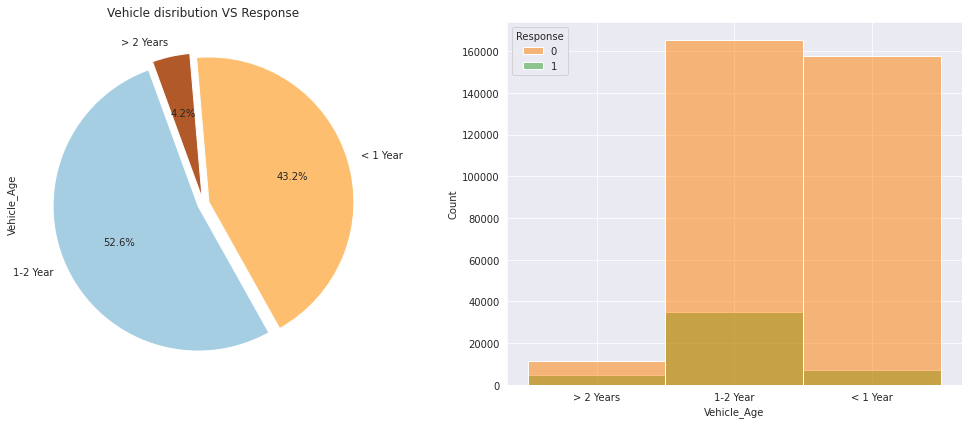

In [20]:
# Analyzing Vehicle age distribution and it's effect on responses 

# defining the figures
fig , axes  = plt.subplots(1,2,figsize = (14,6 ))

# plotting pie chart on vehicle age distribution
df['Vehicle_Age'].value_counts().plot.pie( autopct = '%.1f%%', explode = [0.04,0.04, 0.04], startangle = 110, cmap = 'Paired', ax = axes[0])
axes[0].set_title('Vehicle disribution')

# plotting count plot along with effect on response
sns.histplot(data= df, x = 'Vehicle_Age', hue= df['Response'], palette='Paired_r')
axes[0].set_title('Vehicle disribution VS Response')

plt.tight_layout()
plt.show()



### Vehicle damage

Vehicle_Damage
Yes          192413
No           188696

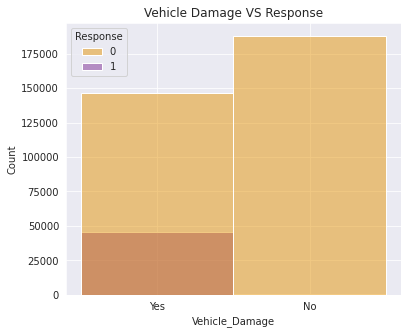

In [21]:
# Analysis on Vehicle damage and effect on response
plt.figure(figsize= (6,5))
sns.histplot(data = df, x= 'Vehicle_Damage', hue= df['Response'], palette = 'CMRmap_r')
plt.title('Vehicle Damage VS Response')

pd.DataFrame(df.groupby('Vehicle_Damage')['Response'].sum())
pd.DataFrame(df['Vehicle_Damage'].value_counts())


### Annual Premium

Text(0.5, 1.0, 'Annual premium vs response')

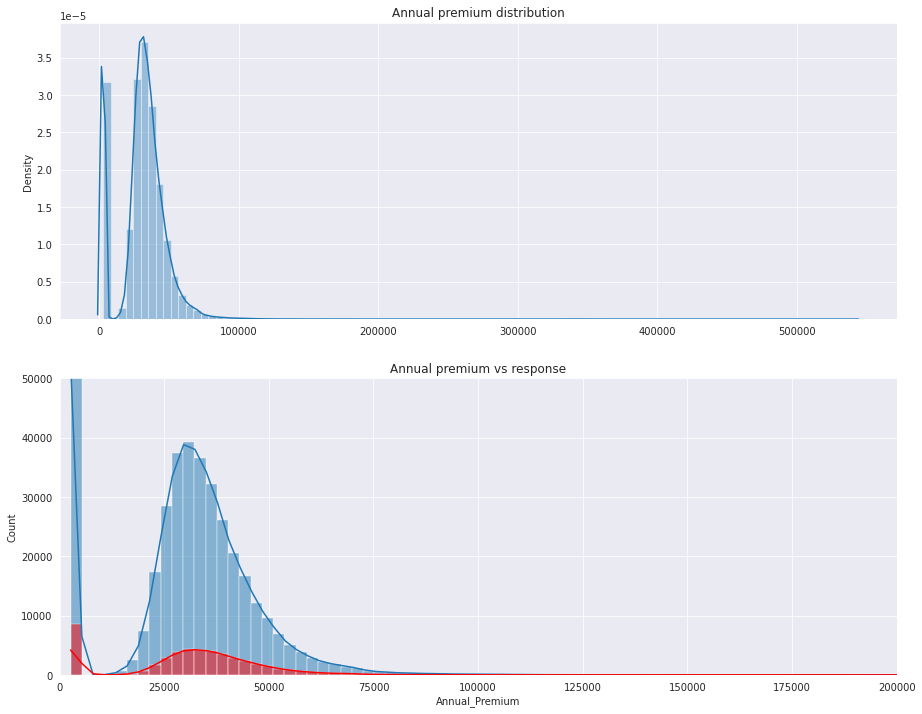

In [22]:
# Analysis on Annual distribution along with response relation with annual premium

# defining figures
fig, axes = plt.subplots(2,1, figsize =( 15,12))

# plotting distplot for annual premium
sns.distplot( x= df['Annual_Premium'], ax = axes[0], bins = 100)
axes[0].set_title('Annual premium distribution')

# plotting hist plot and response distribution 
sns.histplot( x= df['Annual_Premium'], ax = axes[1], bins = 200, kde = True)
sns.histplot( x= df['Annual_Premium'][df['Response'] == 1], ax = axes[1], bins = 200, color = 'r', kde = True)
axes[1].set_xlim(0,200000)
axes[1].set_ylim(0,50000)
axes[1].set_title('Annual premium vs response')

### Policy_sales channel

In [23]:

# converting the data type as int
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)

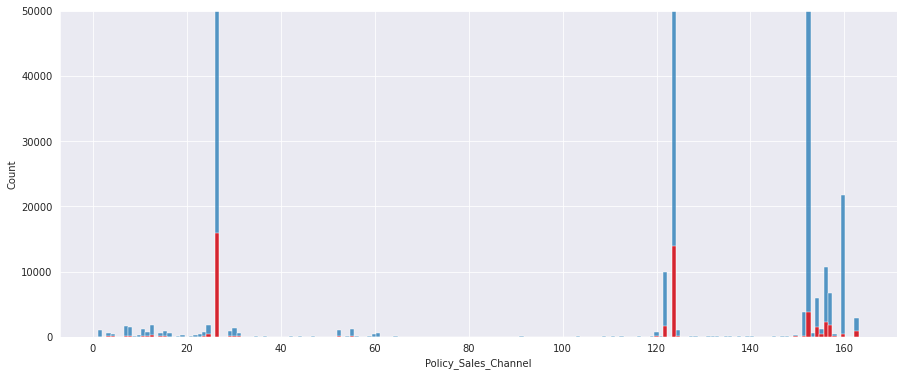

Policy_Sales_Channel  Counts  Response_1
0                   152  134784        3858
1                    26   79700       15891
2                   124   73995       13996
3                   160   21779         475
4                   156   10661        2297
5                   122    9930        1720
6                   157    6684        1794
7                   154    5993        1474
8                   151    3885         122
9                   163    2893         880

In [24]:
# plotting the relation between policy sales channel and responses
plt.figure(figsize = ( 15, 6))

# plotting the histogram plots for sales channel 
sns.histplot( x= df['Policy_Sales_Channel'], bins = 175)
sns.histplot( x= df['Policy_Sales_Channel'][df['Response'] == 1], bins = 175, color = 'r')

plt.ylim(0,50000)
plt.show()


# checking for the top 10 sales channel that produces the most no. of success 
sub_df1 = pd.DataFrame(df['Policy_Sales_Channel'].value_counts()).head(10).reset_index()
sub_df2 = pd.DataFrame(df.groupby('Policy_Sales_Channel')['Response'].sum()).reset_index()
sub_df2.rename(columns = {'Policy_Sales_Channel' : 'index'}, inplace = True)
top_channels = pd.merge(sub_df1 , sub_df2, on = 'index', how = 'left')
top_channels.rename(columns = {'index': 'Policy_Sales_Channel', 'Policy_Sales_Channel' : 'Counts', 'Response' : 'Response_1'  })


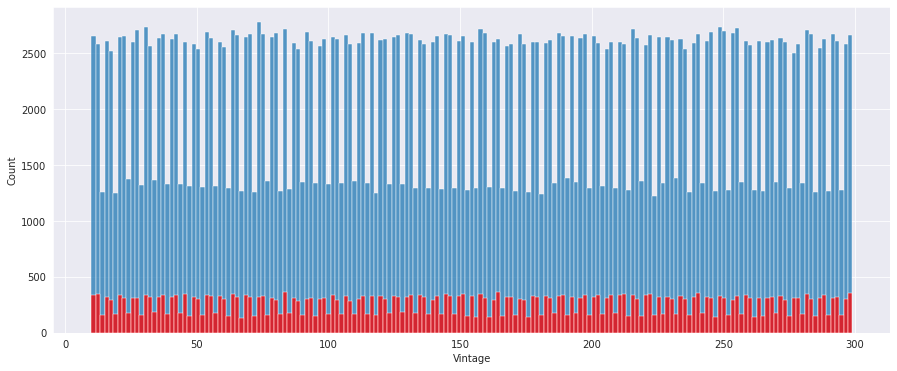

In [25]:
# Vintage distribution and success of insurance

plt.figure(figsize = ( 15, 6))

# Plotting the histograms for vintange and success of insurance along vintage 
sns.histplot( x= df['Vintage'], bins = 175)
sns.histplot( x= df['Vintage'][df['Response'] == 1], bins = 175, color = 'r')

plt.show()

Previously_Insured
0              206481
1              174628

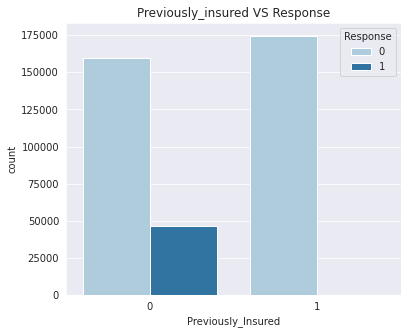

In [ ]:
# Analysis on previously insured damage and effect on response
df['Previously_Insured'].astype(int)
plt.figure(figsize= (6,5))
sns.countplot(data = df, x= 'Previously_Insured', hue= df['Response'], palette = 'Paired')
plt.title('Previously_insured VS Response')

pd.DataFrame(df.groupby('Previously_Insured')['Response'].sum())
pd.DataFrame(df['Previously_Insured'].value_counts())


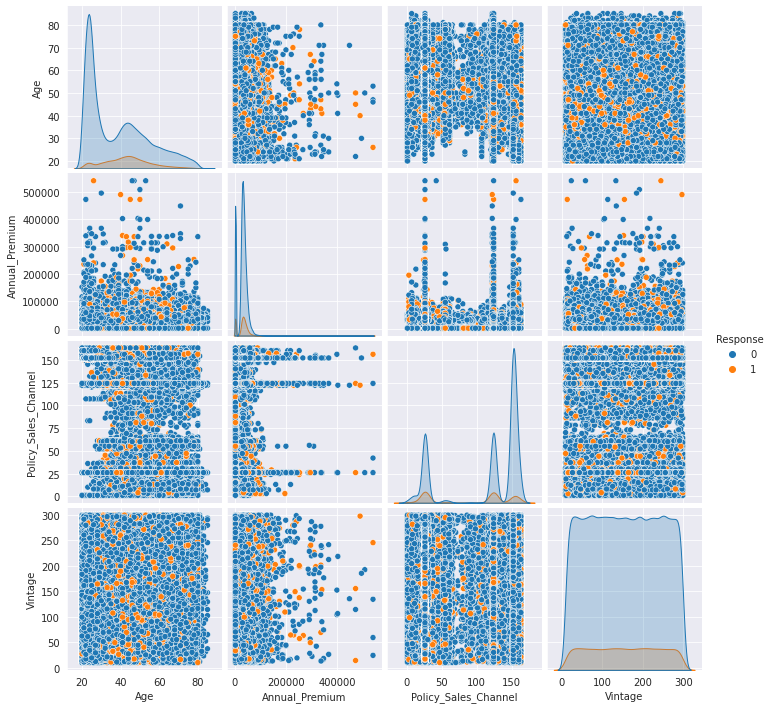

In [ ]:
# plotting pairplot which will give overview of  all the numeric features and responses in 1 plot but surely
sns.pairplot(df[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']], hue= 'Response')
plt.show()

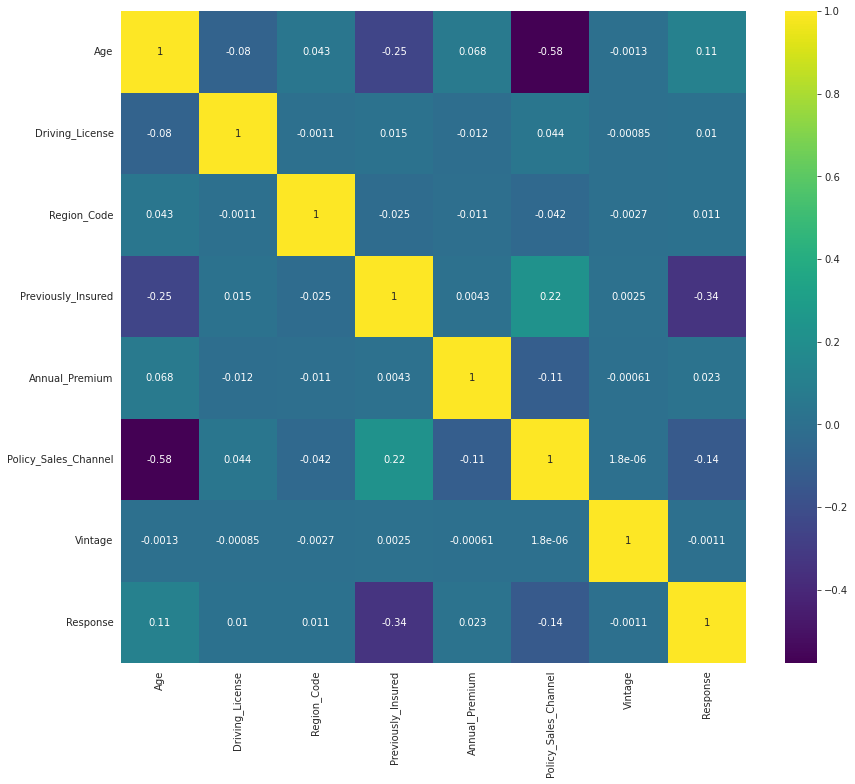

In [26]:
# Plotting heatmap to look at the correlation of features
plt.figure(figsize = (14,12))
sns.heatmap(df.corr(), annot = True,  cmap = 'viridis')
plt.show()

## Summary: Section 2 :- 
Since know that EDA or Exploratory data analysis is a very important task which enables us to treat data in it's best form to get the better predictions and hence we have performed very detailed anlysis on the given data. we can summarize this section in as below.

*  We have seen that in the given dataset 46% observations comes from female gender and 54% comes from males. We also have noticed higher conversion rate in males in comparison of of females.
*  data shows that people having age between 20 to 30 years however conversion rate is high in peoples having age between 30 to 55 years. 
*  Channel no. 29 has the highest conversion follwed by channel no. 9.
*  Almost all the people are having DL who are contacted for insurance.
*  We have seen that if a vehicle has no damage then we do not have any insurance success and hence all the conversions comes from damage vehicle.
*  conversion for annual premium is distributed almost in the same distribution as annual premium.
*  success and vintage ratio are in the almost same ratio.
*  we also have plotted pairplot and correlation heatmap to understand the feature relationships.




## Section 3 : Outliers handling
In this section we will be focusing on outliers specifically in Annual_premium and age columns as both these columns contains actual continueos values. for annual premium we will be using previous plot on Annual_premium which can help us to understand that there are some records which has very high annual premium hence we will first see basis descriptive values for this feature and then we will tabulate some percentiles of data to decide the threshold of outliers and thus records will be removed if values falls beyond threshold. similerly for Age feature we will be using Age distribution plot and based on certain reason we will define the threshold and thus the records will be removed

In [27]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [28]:
# tabulating various percentiles and their values
df['Annual_Premium'].quantile([0.97, 0.98, 0.99, 0.995, 0.999, 1])

0.970     60680.00
0.980     65380.84
0.990     72963.00
0.995     83821.14
0.999    115554.00
1.000    540165.00
Name: Annual_Premium, dtype: float64

In [29]:
# Defining Threshold for Annual premium
max_thresh = df['Annual_Premium'].quantile(0.999)

In [30]:
# printing the before and after results
print('Before :',  df.shape)
df = df[df['Annual_Premium'] < max_thresh]
print('After :',  df.shape)

Before : (381109, 11)
After : (380726, 11)


<AxesSubplot:ylabel='Frequency'>

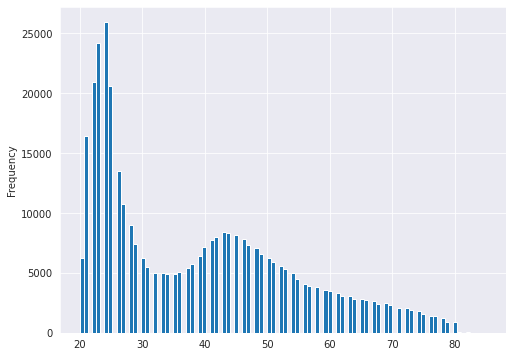

In [31]:
# Age distribution using histogram
plt.figure(figsize = (8,6))
df['Age'].plot(kind = 'hist', bins = 100)

Text(0.5, 1.0, 'Age distribution Vs Response')

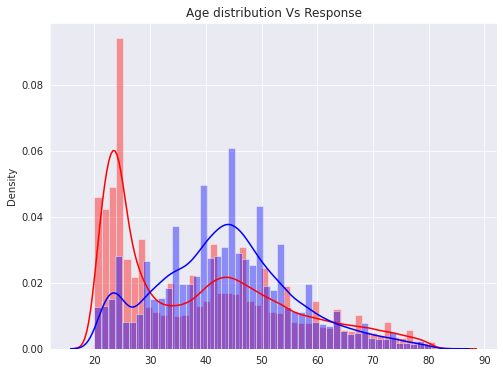

In [32]:
# Plotting the age distribution and success distribution over age
plt.figure(figsize = (8,6))
sns.distplot( x= df['Age'], color= 'r')
sns.distplot( x= df.Age[df['Response'] == 1], color= 'b')
plt.title('Age distribution Vs Response')

In [33]:
# removing age outliers
df = df[df['Age'] < 80]

In [34]:
# checking the shape of the final data
df.shape

(379689, 11)

## Summary: Section 3:- 
In this section we have remove we possible outliers based on certain assumptions. for Annual premium we have seen that there is huge difference between 75th percentile and max value i.e 100 percentile hence we have decided to tabulate various percetile values for this feature and then we have decided 0.999 as threshold and thus we removed the outliers. similerly in age column we have used distribution of age and success rate and we have decided that a record having age greater than 80 can be considered as outliers as the no of records and successes are very very less in numbers and finally we have removed outliers from this column too and finally we have checked dataset shape after outlier removal 

# Section 4 : Data Preprocessing
In this section we will prepare our data for Machine learning models for this first we will region feature as this feature should be a categorical feature but due to number assigned to each region this feature has become a numeric column. To fix this we will make four bins and fit this feature into these bins. Then we will split our data into training and testing dataset then we will move to another step where we will perform scaling on all the numeric features and one encoding on all the categorical features and finally we will combine the both these sub-datasets. As we have seen earlier that we are not having a balance data i.e classes are very different in counts from each other. to handle this we will use SMOTE technique which will generate a balence dataset.

In [35]:
# binning the reason 
def bin_func(i):
  if i < 21:
    return 'Region1'
  elif i>= 21 and i <31:
    return 'Region2'
  elif i>= 31 and i <40:
    return 'Region3'
  else:
    return 'Region4'


In [36]:
# applying the funtion 

df['Region_Code'] = df['Region_Code'].apply(bin_func)

In [37]:
# exploring the head of the data
df.head()

Gender  Age  Driving_License Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1     Region2                   0   > 2 Years   
1    Male   76                1     Region1                   0    1-2 Year   
2    Male   47                1     Region2                   0   > 2 Years   
3    Male   21                1     Region1                   1    < 1 Year   
4  Female   29                1     Region4                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                    26      217         1  
1             No         33536.0                    26      183         0  
2            Yes         38294.0                    26       27         1  
3             No         28619.0                   152      203         0  
4             No         27496.0                   152       39         0

In [38]:
# defining dependent and independent features
X = df.drop('Response', axis = 1)
y = df['Response']

In [39]:
# performing train test split
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [40]:
# checking all the columns
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [41]:
# scaling and encoding the X_train data set
cat_feature_df =  X_train[['Gender', 'Region_Code','Vehicle_Age', 'Vehicle_Damage','Driving_License','Previously_Insured']]
cat_feature_df = cat_feature_df.reset_index().drop('index', axis = 1)

encoded_columns =    pd.get_dummies(cat_feature_df, drop_first =True)


numeric_feature_df = X_train[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]

sc = StandardScaler()
df1 =  pd.DataFrame(sc.fit_transform(numeric_feature_df), columns = ['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'])
scaled_X_train = pd.concat([ df1, encoded_columns], axis = 1)
scaled_X_train

Age  Annual_Premium  Policy_Sales_Channel   Vintage  \
0      -0.306055       -1.710118              0.735597  1.668344   
1       1.384279       -0.485389             -1.591692 -1.164487   
2       1.384279       -0.304584              0.218422  0.018847   
3      -0.696132       -0.334400              0.735597 -0.028964   
4       1.254254        0.839569              0.144539  0.831643   
...          ...             ...                   ...       ...   
284761 -1.151222       -0.351772              0.883362  0.054706   
284762  0.279061       -0.253885              0.218422  0.520868   
284763 -0.371068        0.890945              0.218422  0.269857   
284764  0.409086        0.488863              0.015246  0.867501   
284765  0.344074        0.603567              0.218422 -0.279975   

        Driving_License  Previously_Insured  Gender_Male  Region_Code_Region2  \
0                     1                   0            0                    0   
1                     1                   0            0                    0   
2                     1                   1            1                    0   
3                     1                   1            0                    0   
4                     1                   0            1                    0   
...                 ...                 ...          ...                  ...   
284761                1                   1            1                    0   
284762                1                   1            0                    0   
284763                1                   0            1                    1   
284764                1                   0            1                    0   
284765                1                   0            1                    0   

        Region_Code_Region3  Region_Code_Region4  Vehicle_Age_< 1 Year  \
0                         0                    0                     0   
1                         1                    0                     0   
2                         0                    1                     0   
3                         0                    1                     1   
4                         0                    0                     0   
...                     ...                  ...                   ...   
284761                    0                    0                     1   
284762                    0                    0                     0   
284763                    0                    0                     1   
284764                    0                    1                     0   
284765                    0                    1                     0   

        Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                           0                   1  
1                           0                   1  
2                           0                   0  
3                           0                   0  
4                           0                   1  
...                       ...                 ...  
284761                      0                   0  
284762                      0                   0  
284763                      0                   1  
284764                      0                   1  
284765                      0                   1  

[284766 rows x 13 columns]

In [42]:
# scaling and encoding the X_test data set
cat_df_test = X_test[['Gender', 'Region_Code','Vehicle_Age','Driving_License', 'Vehicle_Damage','Previously_Insured']]
cat_df_test = cat_df_test.reset_index().drop('index', axis = 1)

encoded_columns_test =    pd.get_dummies(cat_df_test, drop_first =True)


numeric_feature_df_test = X_test[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]

df1_test =  pd.DataFrame(sc.transform(numeric_feature_df_test), columns = ['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'])
scaled_X_test = pd.concat([ df1_test , encoded_columns_test], axis = 1)
scaled_X_test

Age  Annual_Premium  Policy_Sales_Channel   Vintage  \
0     -0.176029       -1.710118             -1.794869  0.030800   
1      0.604125        2.629136              0.218422 -1.236205   
2      1.384279        0.959078              0.218422 -0.698325   
3      0.019009        1.769712              0.218422  1.680297   
4     -1.021197        0.117581              0.883362  0.138376   
...         ...             ...                   ...       ...   
94918 -0.046004        0.313356             -1.056046 -1.176440   
94919 -1.216235        0.576339              0.218422  1.369522   
94920  0.539112        0.438964             -1.591692 -1.224252   
94921 -1.021197       -1.710118              0.717127 -0.722231   
94922  1.384279       -1.710118              0.827950  1.512956   

       Driving_License  Previously_Insured  Gender_Male  Region_Code_Region2  \
0                    1                   0            0                    1   
1                    1                   1            0                    0   
2                    1                   0            1                    1   
3                    1                   0            1                    1   
4                    1                   1            1                    0   
...                ...                 ...          ...                  ...   
94918                1                   0            1                    1   
94919                1                   0            1                    0   
94920                1                   0            1                    1   
94921                1                   1            0                    1   
94922                1                   0            1                    0   

       Region_Code_Region3  Region_Code_Region4  Vehicle_Age_< 1 Year  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    1                     1   
...                    ...                  ...                   ...   
94918                    0                    0                     0   
94919                    0                    0                     0   
94920                    0                    0                     0   
94921                    0                    0                     1   
94922                    1                    0                     0   

       Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                          0                   1  
1                          0                   0  
2                          0                   1  
3                          0                   1  
4                          0                   0  
...                      ...                 ...  
94918                      0                   1  
94919                      0                   1  
94920                      1                   1  
94921                      0                   0  
94922                      0                   1  

[94923 rows x 13 columns]

### handling imbalence

In [43]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.

counter = Counter(y_train)
print('Before oversmapling', counter )
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(scaled_X_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

counter = Counter(oversampled_Y)
print('after oversmapling', counter )


Before oversmapling Counter({0: 249695, 1: 35071})
after oversmapling Counter({0: 249695, 1: 249695})


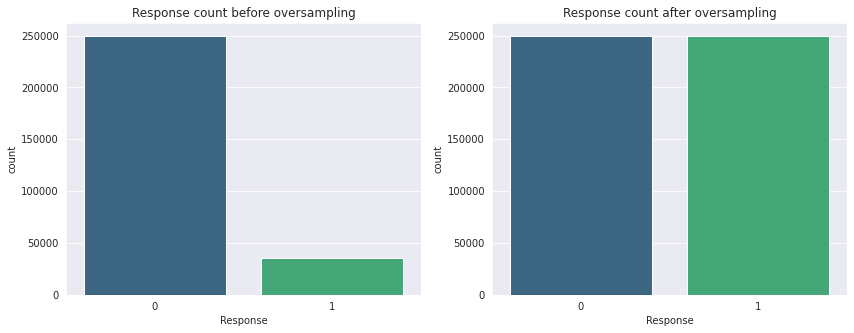

In [44]:
# plotting the above results
fig, axes = plt.subplots(1,2, figsize = (14,5))


sns.countplot(data = y_train, x = y_train, ax = axes[0], palette = 'viridis')
sns.countplot(data = oversampled, x = oversampled_Y, ax = axes[1], palette = 'viridis')

axes[0].set_title('Response count before oversampling')
axes[1].set_title('Response count after oversampling')

plt.show()


## Summery Section 4 : 
In this section we have prepared our data for Machine learning models for this first we have chosen region feature as this feature should be a categorical feature but due to number assigned to each region this feature has become a numeric column. To fix this we have made four bins and fit this feature into these bins. Then we have split our data into training and testing dataset then we have moved to another step where we have performed scaling on all the numeric features and one encoding on all the categorical features and finally we will combine the both these sub-datasets. As we have seen earlier that we are not having a balance data i.e classes are very different in counts from each other. to handle this we have used SMOTE( synthetic minority oversampling technique) technique which has generated a balenced dataset.

## Section 5 :Model implimentation
In this section we will be using various MLL models to predict the insurance success and then we will evaluate each model using multiple metrics such as confusion matrics , classification report and then ROC-AUC curve.
### Models 
1. Decision Tree
2. Logistic Regression
3. Random Forest

### 1. Decision Tree 

In [60]:
# Importing Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# instantiating Decision tree model
model1 =  DecisionTreeClassifier(random_state = 42)

params = {'max_depth' : [5,6,7,8,9,10,12]}

best_d_model = GridSearchCV(model1, param_grid = params , verbose=1, return_train_score= True)

best_d_model.fit(oversampled_X,oversampled_Y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 12]},
             return_train_score=True, verbose=1)

In [61]:
# Getting best parameters from the grid results
best_d_model.best_params_

{'max_depth': 12}

In [62]:
# implimenting best parameter Decision tree using above params
d_model = DecisionTreeClassifier(random_state = 42, max_depth= 10)

d_model.fit(oversampled_X,oversampled_Y)

d_preds = d_model.predict(scaled_X_test)

In [63]:
# Checking probability for each class of top 10 observations
list(d_model.predict_proba(scaled_X_test)[:10])
 

[array([0.21594742, 0.78405258]),
 array([0.99818347, 0.00181653]),
 array([0.82517483, 0.17482517]),
 array([0.21594742, 0.78405258]),
 array([1., 0.]),
 array([0.96052632, 0.03947368]),
 array([1., 0.]),
 array([1., 0.]),
 array([0.28825964, 0.71174036]),
 array([0.46493349, 0.53506651])]

In [64]:
# importing evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [65]:
# Getting cofusion matrix for the results of Decsion tree
confusion_matrix(y_test,d_preds)




array([[60950, 22462],
       [ 2328,  9183]])

In [66]:
# Printing classification report
print(classification_report(y_test,d_preds))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     83412
           1       0.29      0.80      0.43     11511

    accuracy                           0.74     94923
   macro avg       0.63      0.76      0.63     94923
weighted avg       0.88      0.74      0.78     94923



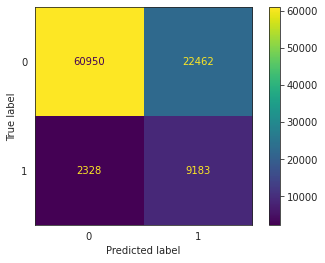

In [67]:
# plotting Classification matrix for decision tree
sns.set_style('white')
plot_confusion_matrix(d_model,scaled_X_test,y_test)

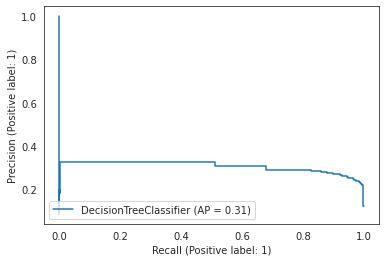

In [68]:
# Plotting precision recall curve
plot_precision_recall_curve(d_model,scaled_X_test,y_test)

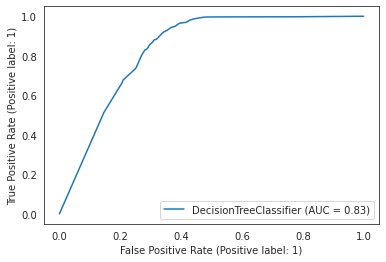

In [69]:
# Plotting ROC curve for decision tree
plot_roc_curve(d_model,scaled_X_test,y_test)

## 2. Logistic regression

In [ ]:
# Implimenting Logistic regression model and finding the best parameters
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(random_state = 42)

log_params = {'penalty' : ['elasticnet'], 'solver' : ['sag', 'saga'], 'max_iter' : [80,100,120], 'l1_ratio': [0,0.1,0.5,0.8,1],}

grid2  = GridSearchCV(model2, param_grid = log_params, cv = 10, scoring = 'roc_auc')

grid2.fit(oversampled_X,oversampled_Y)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'l1_ratio': [0, 0.1, 0.5, 0.8, 1],
                         'max_iter': [80, 100, 120], 'penalty': ['elasticnet'],
                         'solver': ['sag', 'saga']},
             scoring='roc_auc')

In [ ]:
# finding best parameters for Logistic regression
grid2.best_params_

{'l1_ratio': 0, 'max_iter': 120, 'penalty': 'elasticnet', 'solver': 'saga'}

{'l1_ratio': 0, 'max_iter': 120, 'penalty': 'elasticnet', 'solver': 'saga'}

In [53]:
# Implimenting Logistic regression besed on best params
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0, max_iter =120, solver = 'saga')
log_model.fit(oversampled_X, oversampled_Y)

log_preds = log_model.predict(scaled_X_test)

In [54]:
# Getting confusion martix for logistic regression model
confusion_matrix(y_test,log_preds)

array([[49738, 33674],
       [  378, 11133]])

In [55]:
# Printing classification report for logistic regression
print(classification_report(y_test,log_preds))

              precision    recall  f1-score   support

           0       0.99      0.60      0.74     83412
           1       0.25      0.97      0.40     11511

    accuracy                           0.64     94923
   macro avg       0.62      0.78      0.57     94923
weighted avg       0.90      0.64      0.70     94923



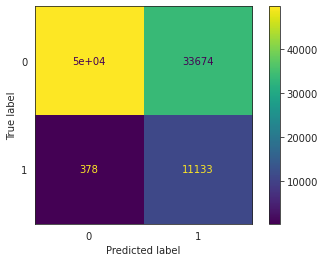

In [56]:
# plotting confusion matrix for Logistic regression
plot_confusion_matrix(log_model, scaled_X_test, y_test)

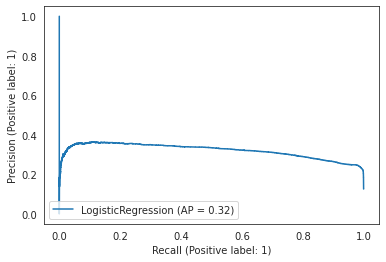

In [57]:
# Plotting precision recall curve for Logistic regression
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

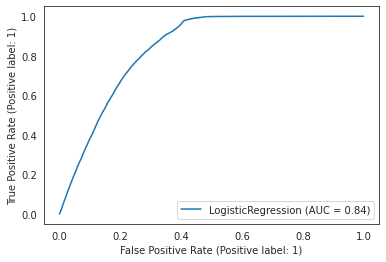

In [58]:
# Roc curve for logistic regression
plot_roc_curve(log_model, scaled_X_test, y_test)

## 3. Random Forest

In [78]:
# applying Random forest and finding out best params out of a grid
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()

params = { 'n_estimators' : [200,300] , 'max_depth': [8,10,12], 'n_jobs' : [5]}


grid3 =  GridSearchCV(model3, param_grid = params, scoring = 'roc_auc')

grid3.fit(oversampled_X, oversampled_Y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 12], 'n_estimators': [200, 300],
                         'n_jobs': [5]},
             scoring='roc_auc')

In [79]:
# Getting best estimator for Random Forest model
grid3.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=300, n_jobs=5)

In [80]:
# getting best best parameters for best RF model
grid3.best_params_

{'max_depth': 12, 'n_estimators': 300, 'n_jobs': 5}

In [81]:
# Impimenting best model for best params which comes out from above grid
R_model = RandomForestClassifier(n_estimators = 300, max_depth = 12 , n_jobs = 5)
R_model.fit(oversampled_X, oversampled_Y)

R_preds = R_model.predict(scaled_X_test)

In [82]:
# Getting confusion matrix
confusion_matrix(y_test,R_preds)

array([[56981, 26431],
       [ 1107, 10404]])

In [83]:
# printing classification report
print(classification_report(y_test,R_preds))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81     83412
           1       0.28      0.90      0.43     11511

    accuracy                           0.71     94923
   macro avg       0.63      0.79      0.62     94923
weighted avg       0.90      0.71      0.76     94923



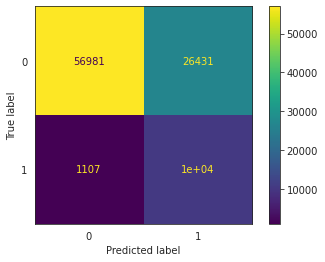

In [84]:
# Plotting confusion matrix for random forest model
sns.set_style('white')
plot_confusion_matrix(R_model,scaled_X_test,y_test)

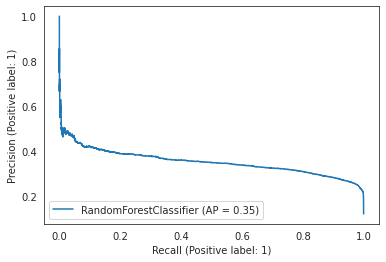

In [85]:
plot_precision_recall_curve(R_model,scaled_X_test,y_test)

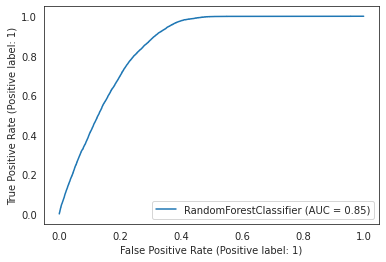

In [86]:
plot_roc_curve(R_model,scaled_X_test,y_test)

## Summary : Section 5 : - Model implimentation
In this section we have applied three models on the ready dataset that came out from previous section. we have seen that results of Decison Tree was approx. equal to the results of Random Forest but the reslults of Logistic regression are not that good hence if we are supposed to choose a model for our model explanability and results we can choose Decison tree model which is easy to explain and also results such as AUC, confusion matrix precision, recall etc. therefore in the next secion we will be cheking the feature importance on Decision tree model and random forest model.

## Section 6: Model explainability
Here we will be understanding what are the important feature and how important these features are first we will look at from the global point of view which features are import to which class and we will deep dive into local expainability to understand how a particular observation is behaving in reference of a class. for Global feature importance we will use SHAP library and for local explainability we will use LIME librarary

In [87]:
! pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
feature_names = list(scaled_X_train.astype(float))

cat_columns  = list(cat_feature_df)


feature_names_cat = list(encoded_columns.astype(float))

In [89]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import shap 
import graphviz
sns.set_style('darkgrid') 

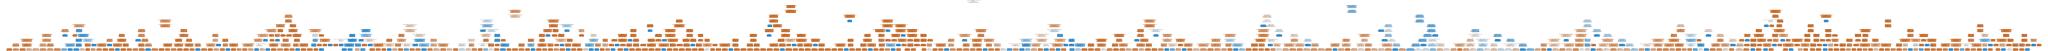

In [90]:
# Visualizing how model classified the entire data
tree_graph = export_graphviz(d_model, out_file=None, feature_names = feature_names, rounded=True, filled=True)
graphviz.Source(tree_graph)

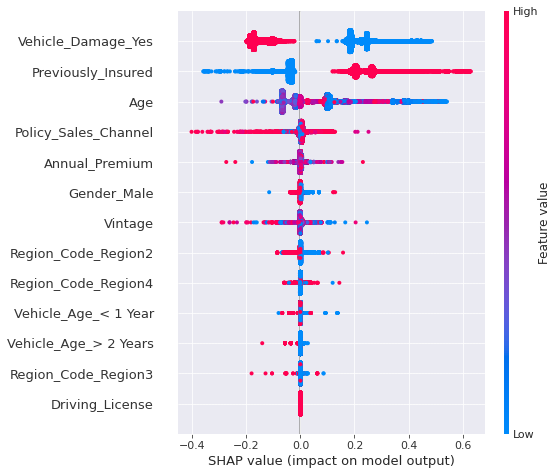

In [92]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(d_model).shap_values(scaled_X_test)
shap.summary_plot(shap_values[0], scaled_X_test)

### Local explainability

In [93]:
# importing imporatant modules for local explainability
import sklearn.datasets
import sklearn.ensemble
import lime
import lime.lime_tabular
from __future__ import print_function


# Generating prediction probabbilities for each model and converting them into float 
predict_fn_d_model   = lambda x: d_model.predict_proba(x).astype(float)
predict_fn_log_model = lambda x: log_model.predict_proba(x).astype(float)
predict_fn_R_model   = lambda x: R_model.predict_proba(x).astype(float)



In [94]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(scaled_X_train.values ,feature_names = feature_names,class_names=['0','1'],
                                                   categorical_features=cat_columns  , categorical_names=feature_names_cat, kernel_width=3)

In [95]:
# Pick the observation in the validation set for which explanation is required
observation_1 = 5

In [96]:
exp = explainer.explain_instance(scaled_X_test.iloc[observation_1], predict_fn_d_model, num_features=6)
exp.show_in_notebook(show_all=False)

In [97]:
# Look at the actual value in the validation set
print(y_test.iloc[observation_1])

0


In [98]:
exp = explainer.explain_instance(scaled_X_test.iloc[observation_1], predict_fn_log_model, num_features=6)
exp.show_in_notebook(show_all=False)

In [99]:
exp = explainer.explain_instance(scaled_X_test.iloc[observation_1], predict_fn_R_model, num_features=6)
exp.show_in_notebook(show_all=False)

## Summary : Section 6 :- Model explainability
In this section we have covered the explainability globaly and locally using all the features first we have used SHAP scatter plot to understand how the valus of indiviual features are related to final output and then we have seen id we have any particular observation what are factors that push it towards a particular class for this explainability we have used LIME library that helps us to produce effectiveness of each feature on a given observation.

# Conclusions

*  We have seen that in the given dataset 46% observations comes from female gender and 54% comes from males. We also have noticed higher conversion rate in males in comparison of of females.
*  data shows that people having age between 20 to 30 years however conversion rate is high in peoples having age between 30 to 55 years. 
*  Channel no. 29 has the highest conversion follwed by channel no. 9.
*  Almost all the people are having DL who are contacted for insurance.
*  We have seen that if a vehicle has no damage then we do not have any insurance success and hence all the conversions comes from damage vehicle.
*  conversion for annual premium is distributed almost in the same distribution as annual premium.
*  success and vintage ratio are in the almost same ratio.
*  we also have plotted pairplot and correlation heatmap to understand the feature relationships.

*  A linear model is not that much effective however a tree based model come out to be a good model.
*  Previously Insured feature is most important feature in terms of predictions.
*  Driving license is the least important feature.